In [1]:
from IPython.core.pylabtools import print_figure
from IPython.display import Image, SVG, Math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ip = get_ipython()
list(ip.display_formatter.formatters.keys())

['text/plain',
 'text/html',
 'text/markdown',
 'image/svg+xml',
 'image/png',
 'application/pdf',
 'image/jpeg',
 'text/latex',
 'application/json',
 'application/javascript']

In [3]:
from IPython.display import Image, SVG, display


In [4]:
class MyTest:

    def __str__(self):
        return 'STRING'

    # 7
    def _repr_pretty_(self, p, cycle):
        if cycle:
            return
        p.text('PRETTY')

    # 2
    def _repr_markdown_(self):
        return "***markdown***"
    # 3
    def _repr_latex_(self):
        return r"$\alpha$"

    # 1
    def _repr_html_(self):
        return "<h1>HTML</h1>"

    # 5
    def _repr_png_(self):
        fpath = "/home/mmh/Pictures/Apple-multicolor-icon.png"
        return open(fpath, 'r').read()
    # 6
    def _repr_jpeg_(self):
        fpath = "/home/mmh/Pictures/Thor.jpg"
        return open(fpath, 'r').read()

    # 4
    def _repr_svg_(self):
        flag="""<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="1235" height="650" viewBox="0 0 7410 3900">
<rect width="7410" height="3900" fill="#b22234"/>
<path d="M0,450H7410m0,600H0m0,600H7410m0,600H0m0,600H7410m0,600H0" stroke="#fff" stroke-width="300"/>
<rect width="2964" height="2100" fill="#3c3b6e"/>
<g fill="#fff">
<g id="s18">
<g id="s9">
<g id="s5">
<g id="s4">
<path id="s" d="M247,90 317.534230,307.082039 132.873218,172.917961H361.126782L176.465770,307.082039z"/>
<use xlink:href="#s" y="420"/>
<use xlink:href="#s" y="840"/>
<use xlink:href="#s" y="1260"/>
</g>
<use xlink:href="#s" y="1680"/>
</g>
<use xlink:href="#s4" x="247" y="210"/>
</g>
<use xlink:href="#s9" x="494"/>
</g>
<use xlink:href="#s18" x="988"/>
<use xlink:href="#s9" x="1976"/>
<use xlink:href="#s5" x="2470"/>
</g>
</svg>
"""
        return flag

FileNotFoundError: [Errno 2] No such file or directory: '/home/mmh/Pictures/Apple-multicolor-icon.png'

FileNotFoundError: [Errno 2] No such file or directory: '/home/mmh/Pictures/Thor.jpg'

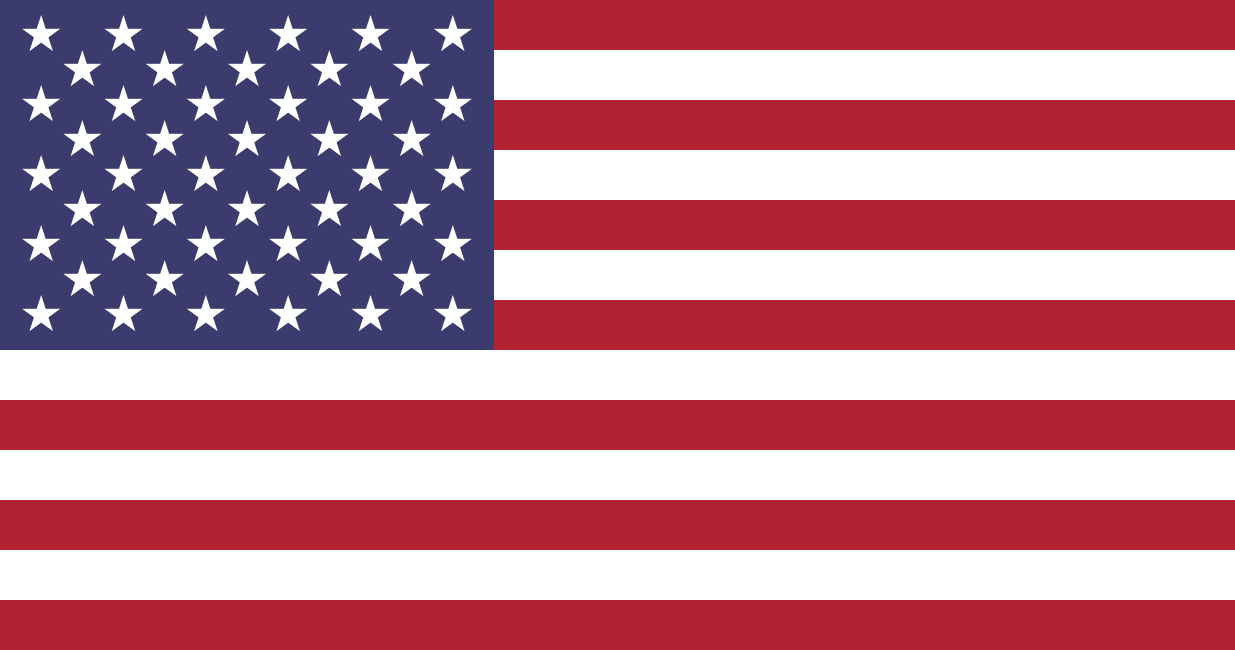

In [5]:
MyTest()

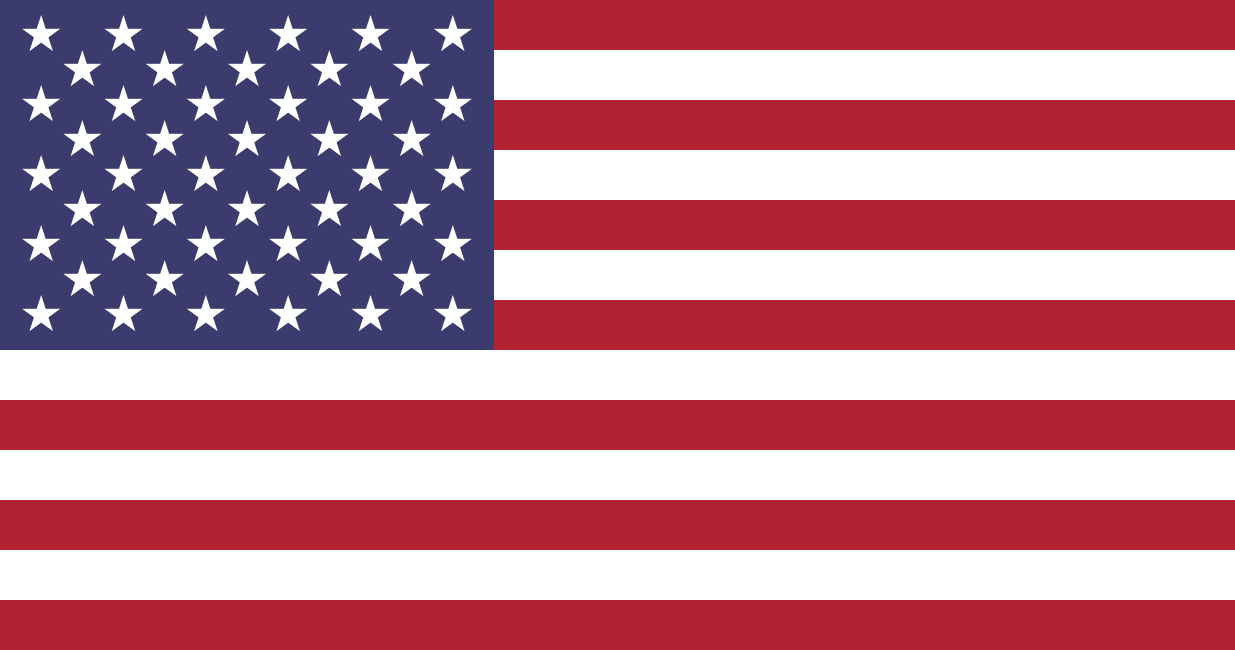

In [6]:
display(MyTest(), include='image/svg+xml')

In [7]:
# FIXME. notebook mode will leave space for blank plots
class Gaussian(object):
    """A simple object holding data sampled from a Gaussian distribution.
    """
    def __init__(self, mean=0, std=1, size=1000):
        self.data = np.random.normal(mean, std, size)
        self.mean = mean
        self.std = std
        self.size = size
        # For caching plots that may be expensive to compute
        self._png_data = None
        self._svg_data = None
        
    def _figure_data(self, format):
        fig, ax = plt.subplots()
        ax.plot(self.data, 'o')
        ax.set_title(self._repr_latex_())
        data = print_figure(fig, format)
        # We MUST close the figure, otherwise IPython's display machinery
        # will pick it up and send it as output, resulting in a double display
        plt.close(fig)
        return data
    
    # Here we define the special repr methods that provide the IPython display protocol
    # Note that for the two figures, we cache the figure data once computed.
    
    def _repr_png_(self):
        if self._png_data is None:
            self._png_data = self._figure_data('png')
        return self._png_data


    def _repr_svg_(self):
        if self._svg_data is None:
            self._svg_data = self._figure_data('svg')
        return self._svg_data
    
    def _repr_latex_(self):
        return r'$\mathcal{N}(\mu=%.2g, \sigma=%.2g),\ N=%d$' % (self.mean,
                                                                 self.std, self.size)
    
    # We expose as properties some of the above reprs, so that the user can see them
    # directly (since otherwise the client dictates which one it shows by default)
    @property
    def png(self):
        return Image(self._repr_png_(), embed=True)
    
    @property
    def svg(self):
        return SVG(self._repr_svg_())
        
    @property
    def latex(self):
        return Math(self._repr_svg_())
    
    # An example of using a property to display rich information, in this case
    # the histogram of the distribution.  We've hardcoded the format to be png
    # in this case, but in production code it would be trivial to make it an option
    @property
    def hist(self):
        fig, ax = plt.subplots()
        ax.hist(self.data, bins=100)
        ax.set_title(self._repr_latex_())
        data = print_figure(fig, 'png')
        plt.close(fig)
        return Image(data, embed=True)

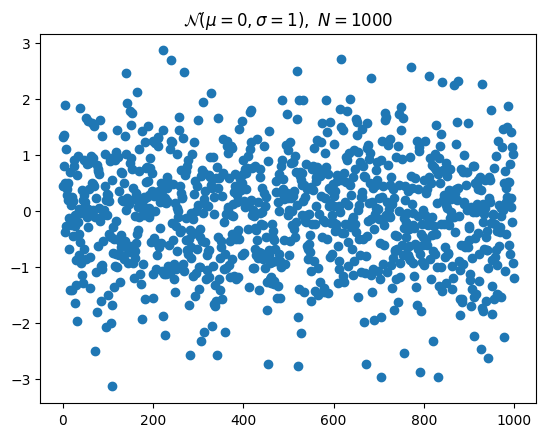

In [8]:
x = Gaussian()
x

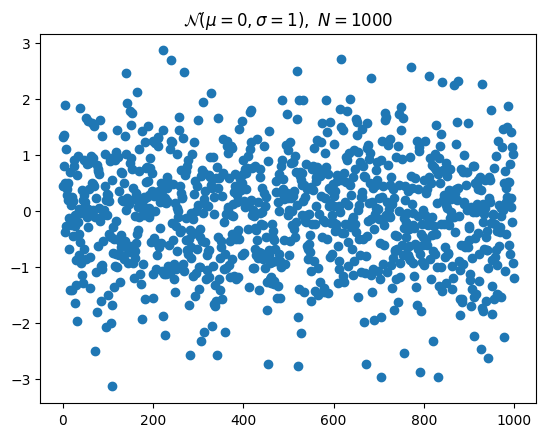

In [9]:
x.png

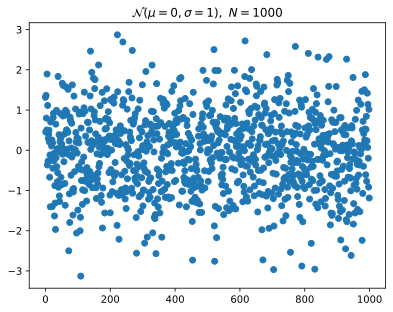

In [10]:
x.svg

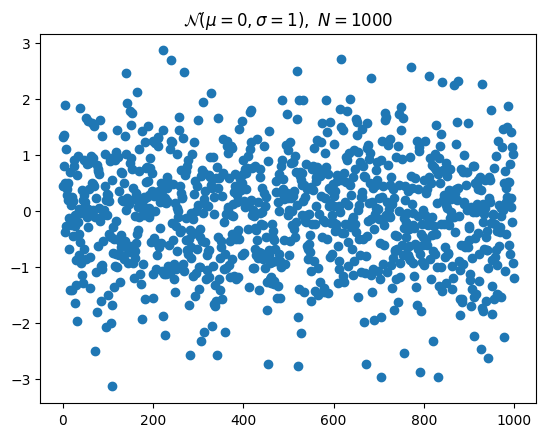

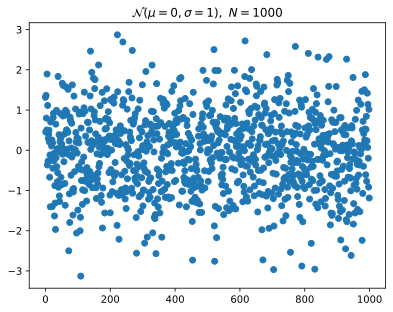

In [11]:
display(x.png)
display(x.svg)